In [ ]:
# Import Libraries
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import matplotlib.pyplot as plt
# Keras API
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
     

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Get Data From Google Drive
train_dir ="/content/drive/MyDrive/Colab Notebooks/mini/train"
test_dir="/content/drive/MyDrive/Colab Notebooks/mini/test"

In [ ]:
# Count of Images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

In [ ]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir) 
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

2 Classes
100 Train images
20 Test images


In [1]:
#preprocessing
from keras.preprocessing.image import ImageDataGenerator 
#data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [2]:
# set height and width and color of input image.
img_width,img_height =256,256
input_shape=(img_width,img_height,3)#3 refers to the number of channels in the input image, i.e., Red, Green, and Blue (RGB) color channels.
batch_size =32

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
validation_generator = train_datagen.flow_from_directory(
                                            train_dir, # same directory as training data
                                            target_size=(img_height, img_width),
                                            batch_size=batch_size)
     

NameError: ignored

In [ ]:
train_generator.class_indices

{'benign': 0, 'malware': 1}

In [ ]:
# CNN building.
model = Sequential()

# First Convlutional Layer.
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

# Second Convlutional Layer.
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convlutional Layer.
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))  

# Flattening.
model.add(Flatten())

# Fuly Connected Layer.
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 84, 84, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 82, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 41, 41, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 39, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 64)       0

In [3]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers) 


NameError: ignored

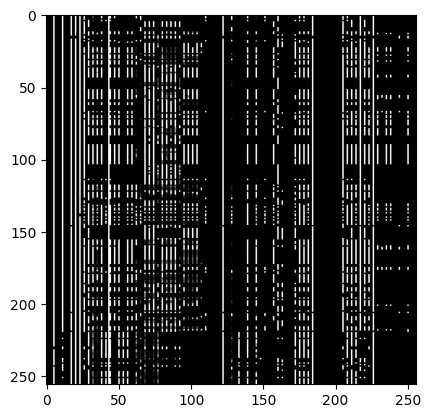

In [ ]:
from keras.preprocessing import image
import numpy as np
import tensorflow as tf

#preprocess image
img1 = tf.keras.utils.load_img('/content/drive/MyDrive/Colab Notebooks/mini/train/benign/b10.png', target_size=(256, 256))
plt.imshow(img1)




In [ ]:
# Visualizing output after every layer.
from keras.models import Model
import numpy
import PIL
import tensorflow as tf


from keras.preprocessing import image
import numpy as np
from PIL import Image

img_path = '/content/drive/MyDrive/Colab Notebooks/mini/train/benign/b10.png'
img = tf.keras.utils.load_img(img_path, target_size=(256, 256))
img = tf.keras.preprocessing.image.img_to_array(img)
img = img/255.0
img = np.expand_dims(img, axis=0)

#First Convlutional Layer
conv2d_output = Model(inputs=model.input, outputs=model.get_layer('conv2d').output)
max_pooling2d_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d').output)


#Second Convlutional Layer
conv2d_1_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_1').output)
max_pooling2d_1_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_1').output)


#Third Convlutional Layer
conv2d_2_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
max_pooling2d_2_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_2').output)

#Flatten
flatten_output = Model(inputs=model.input,outputs=model.get_layer('flatten').output)
conv2d_features = conv2d_output.predict(img)
max_pooling2d_features = max_pooling2d_output.predict(img)
conv2d_1_features = conv2d_1_output.predict(img)
max_pooling2d_1_features = max_pooling2d_1_output.predict(img)
conv2d_2_features = conv2d_2_output.predict(img)
max_pooling2d_2_features = max_pooling2d_2_output.predict(img)
flatten_1_features = flatten_output.predict(img)


1/1 [==============================] - 0s 147ms/step


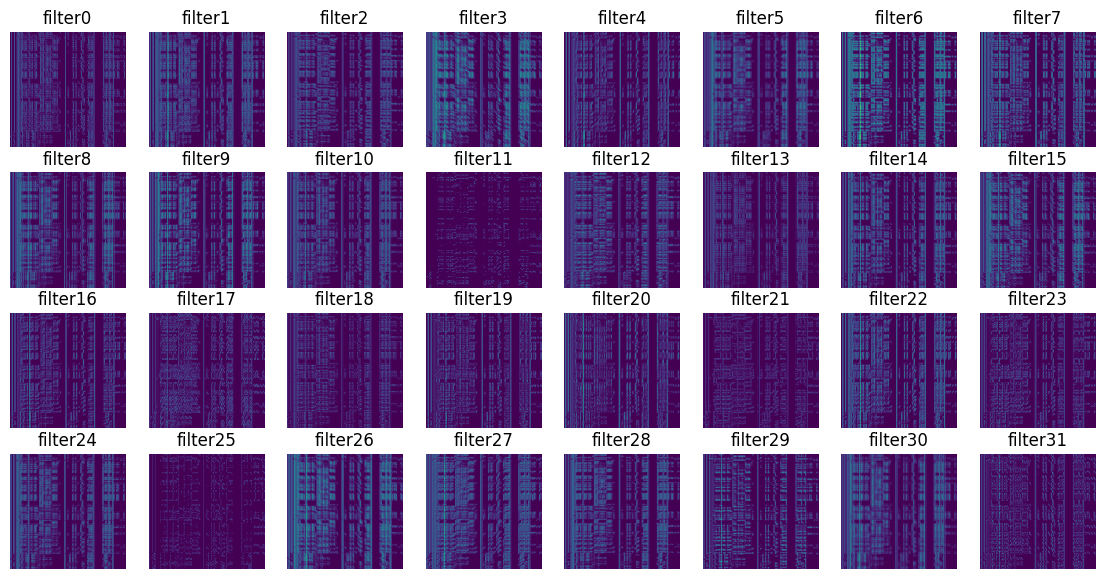

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_features[0, :, :, i], cmap='viridis') # Visualizing in color mode.
plt.show()

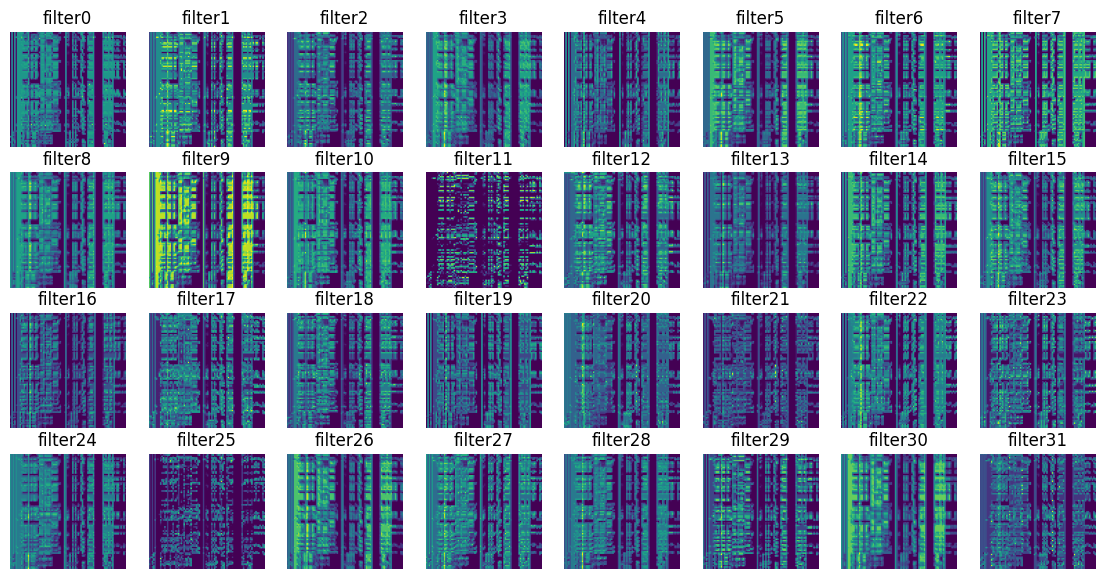

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_features[0, :, :, i], cmap='viridis')
plt.show()

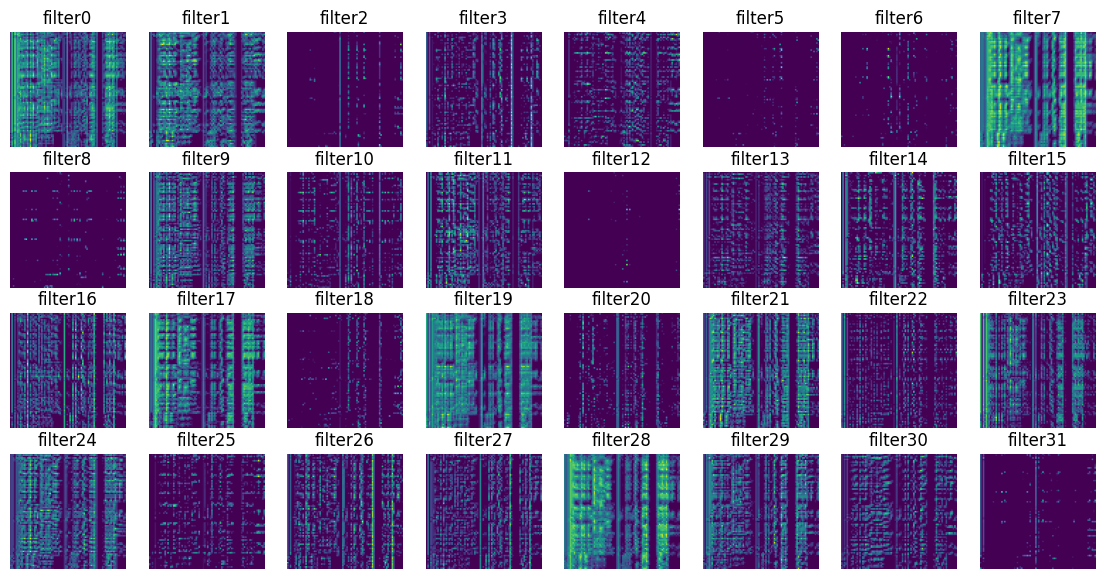

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

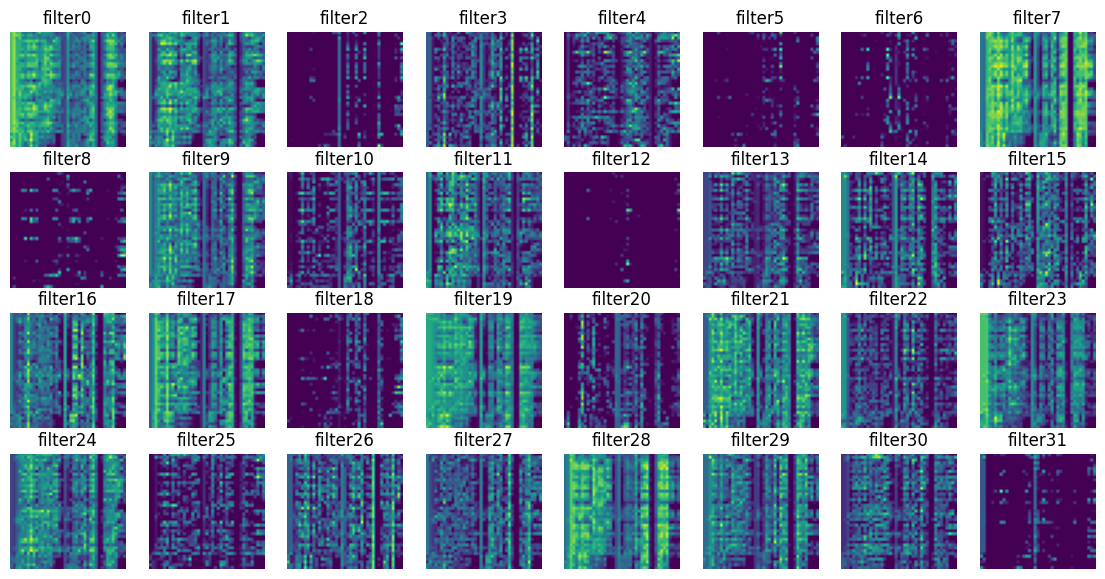

In [ ]:
#visualize in color mode.
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_1_features[0, :, :, i], cmap='viridis') 
plt.show()

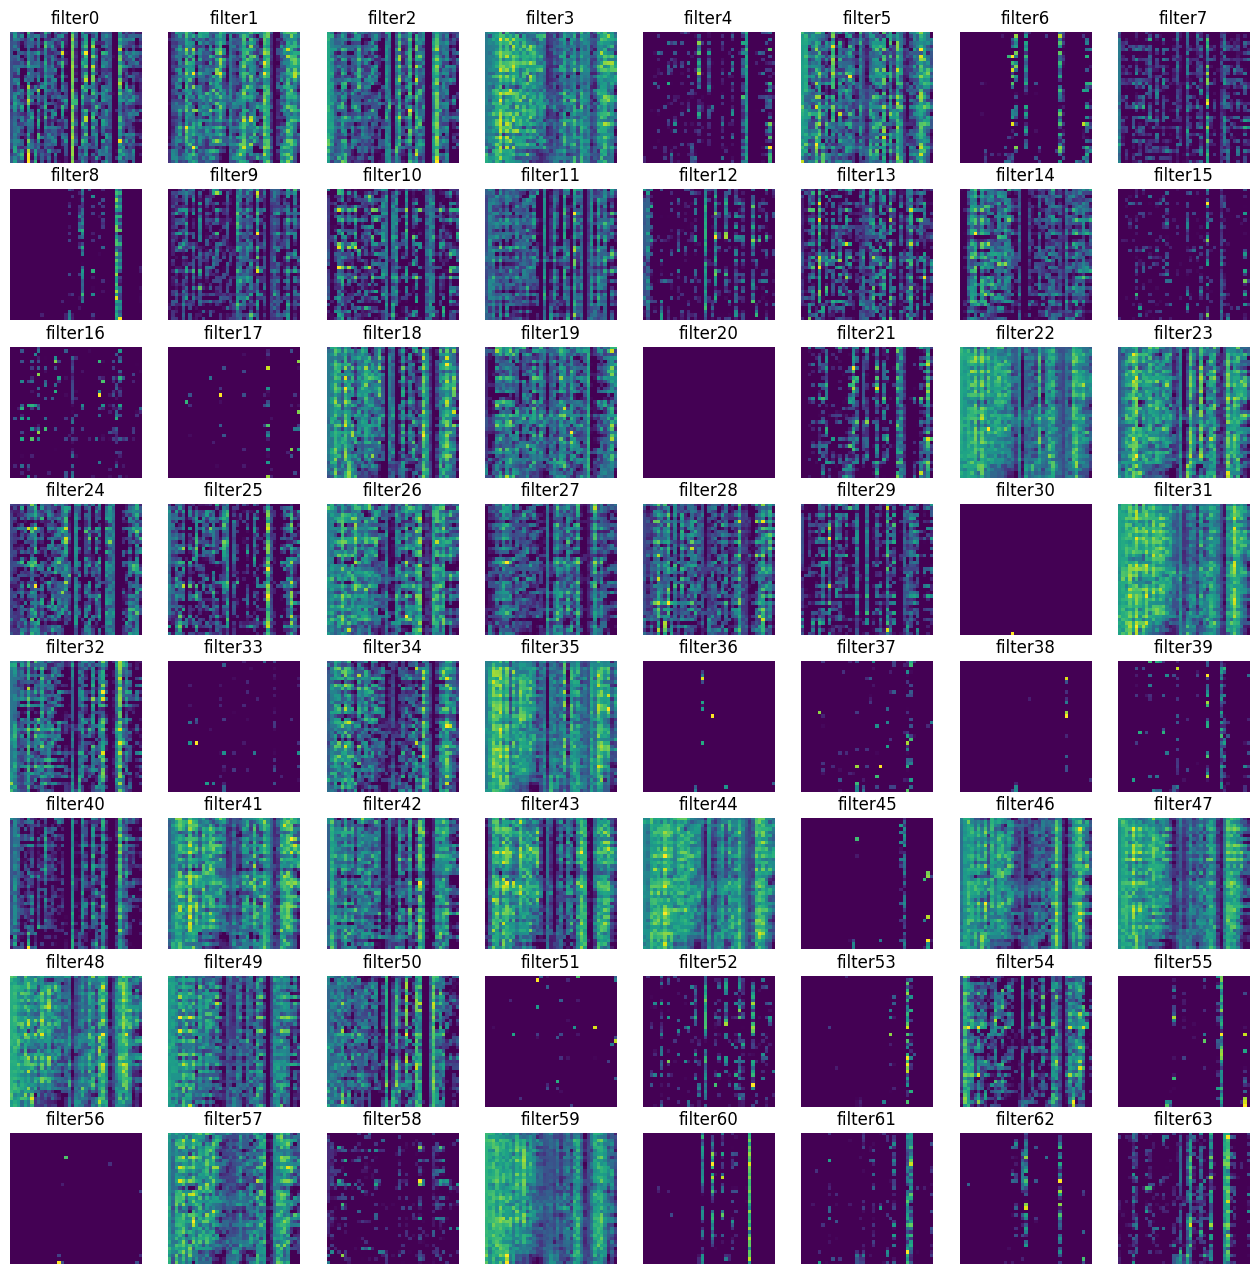

In [ ]:

import matplotlib.image as mpimg

fig=plt.figure(figsize=(16,16))
columns =8 
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

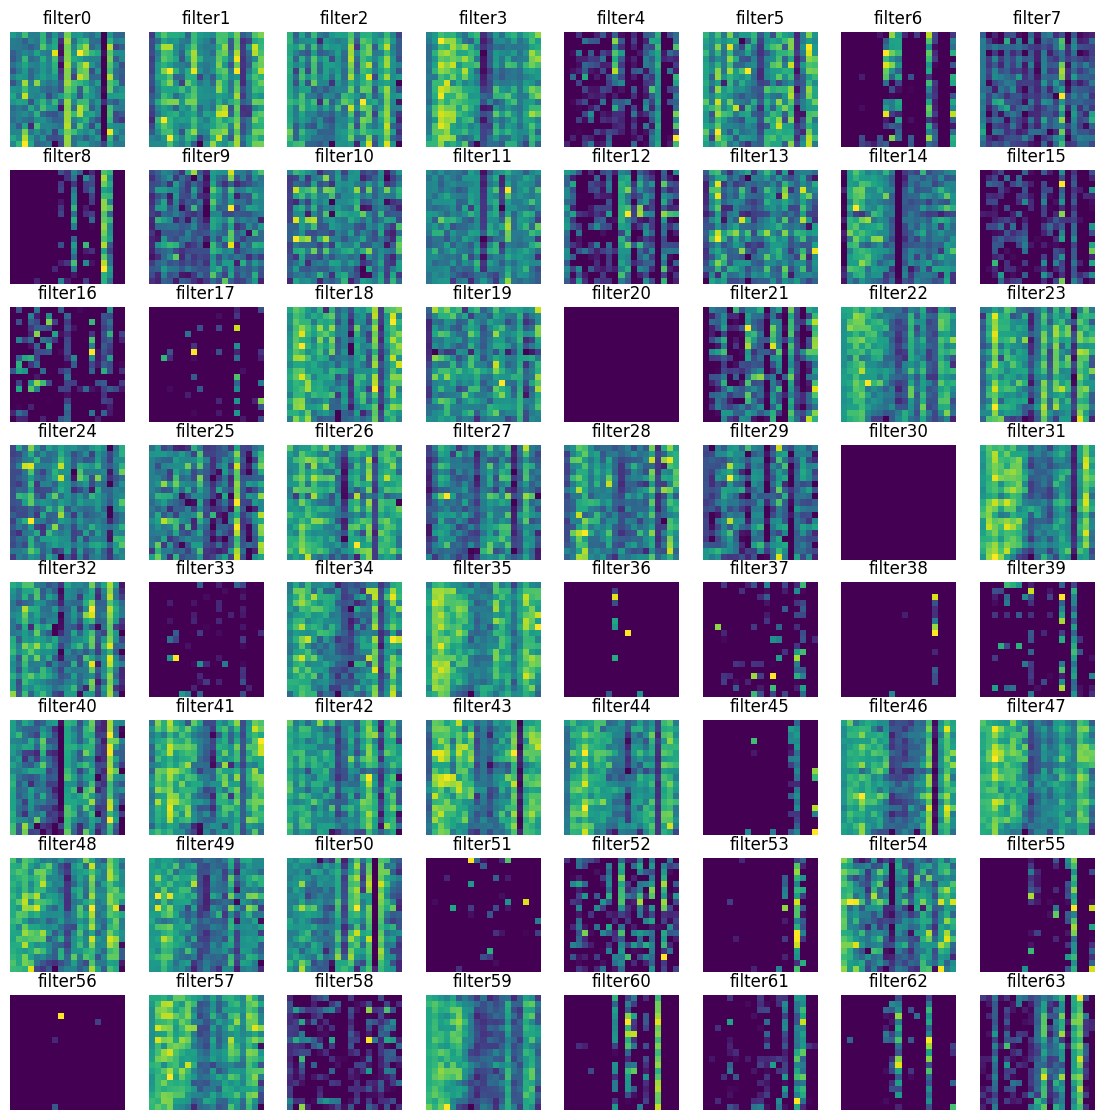

In [ ]:

import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,14))
columns = 8
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_2_features[0, :, :, i],cmap='viridis')
plt.show()


In [ ]:
opt=keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

train=model.fit_generator(train_generator,epochs=20,steps_per_epoch=train_generator.samples // batch_size,verbose=1)

Epoch 1/20
3/3 [==============================] - 10s 3s/step - loss: 1.5923 - accuracy: 0.4412
Epoch 2/20
3/3 [==============================] - 11s 3s/step - loss: 0.9901 - accuracy: 0.5000
Epoch 3/20
3/3 [==============================] - 7s 2s/step - loss: 0.7328 - accuracy: 0.5147
Epoch 4/20
3/3 [==============================] - 7s 3s/step - loss: 0.6901 - accuracy: 0.5147
Epoch 5/20
3/3 [==============================] - 10s 3s/step - loss: 0.6841 - accuracy: 0.5208
Epoch 6/20
3/3 [==============================] - 9s 3s/step - loss: 0.6817 - accuracy: 0.5147
Epoch 7/20
3/3 [==============================] - 11s 4s/step - loss: 0.6802 - accuracy: 0.5000
Epoch 8/20
3/3 [==============================] - 14s 4s/step - loss: 0.6675 - accuracy: 0.6176
Epoch 9/20
3/3 [==============================] - 9s 4s/step - loss: 0.6735 - accuracy: 0.6176
Epoch 10/20
3/3 [==============================] - 8s 3s/step - loss: 0.6415 - accuracy: 0.6471
Epoch 11/20
3/3 [===========================

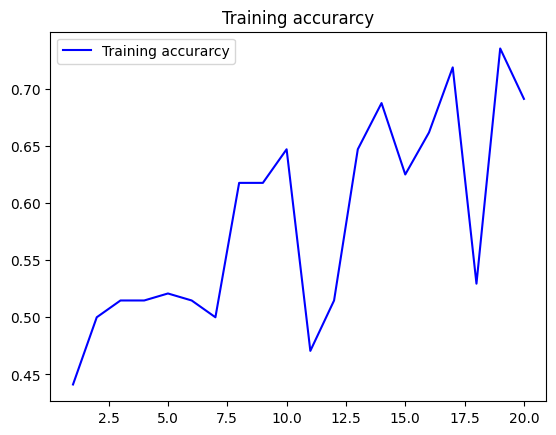

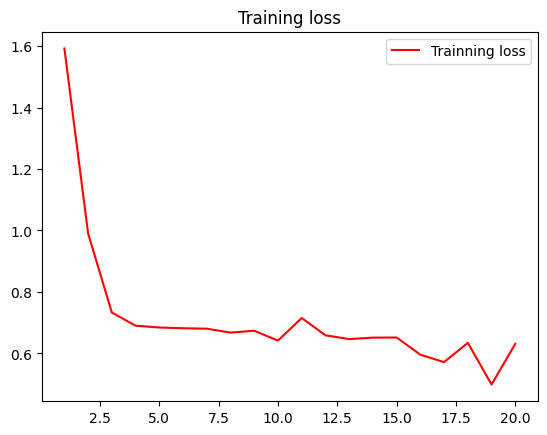

In [ ]:
acc = train.history['accuracy']

loss = train.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accurarcy')

plt.title('Training accurarcy')
plt.legend()

plt.figure()


plt.plot(epochs, loss, 'r', label='Trainning loss')
plt.title('Training loss')
plt.legend()
plt.show()

In [ ]:

from keras.models import load_model
model.save('/content/drive/MyDrive/Colab Notebooks/mini/mal.h5')

In [ ]:

from keras.models import load_model
model.save_weights('/content/drive/MyDrive/Colab Notebooks/mini/mal_weights.h5')

In [ ]:
# Load the saved model
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Colab Notebooks/mini/mal.h5')

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate_generator(test_generator, steps=len(test_generator))
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


Test loss: 0.14355909824371338
Test accuracy: 1.0


In [ ]:

classes = train_generator.class_indices 
classes

{'benign': 0, 'malware': 1}

In [ ]:

from keras.models import load_model
model=load_model('/content/drive/MyDrive/Colab Notebooks/mini/mal.h5')

Classes = ['benign', 'malware']

1/1 [==============================] - 0s 85ms/step


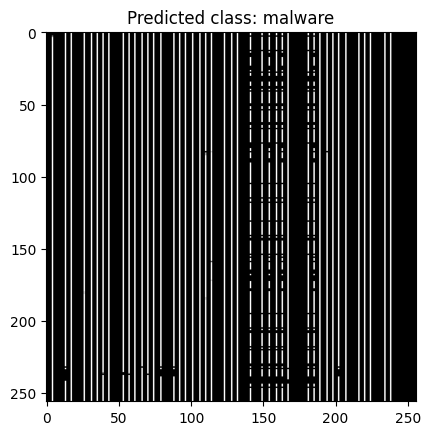

In [ ]:
import tensorflow as tf
import numpy as np

def prepare(img_path):
    img = tf.keras.utils.load_img(img_path, target_size=(256, 256))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img/255.0
    img = np.expand_dims(img, axis=0)
    return img
img_path = '/content/drive/MyDrive/Colab Notebooks/mini/test/mal_test/m0.png'
img = prepare(img_path)
preds = model.predict(img)


import matplotlib.pyplot as plt


img = tf.keras.utils.load_img(img_path, target_size=(256, 256))


plt.imshow(img)


class_idx = np.argmax(preds)
class_label = Classes[class_idx]


plt.title('Predicted class: {}'.format(class_label))
plt.show()

